In [ ]:
import pandas as pd
path = "https://github.com/alexesc/data/raw/main/task1feb2022/streams/31D3_DCJKI.xlsx"
sheet_name = "Sheet1"
S31D3 = pd.read_excel(path, sheet_name, engine='openpyxl')
df = S31D3

In [ ]:
# Convert the time column to a datetime data type
df['time'] = pd.to_datetime(df['Date'])

# Set the time column as the index of the DataFrame
#df.set_index('time', inplace=True)

df

,Site_Code,Date,Stage (ft),Discharge_cfs,time
0,31D3,2019-04-23,0.74,0.60,2019-04-23
1,31D3,2019-04-24,0.72,0.46,2019-04-24
2,31D3,2019-04-25,0.71,0.38,2019-04-25
3,31D3,2019-04-26,0.70,0.37,2019-04-26
4,31D3,2019-04-27,0.71,0.43,2019-04-27
...,...,...,...,...,...
1189,31D3,2023-01-15,0.47,1.60,2023-01-15
1190,31D3,2023-01-16,0.45,1.46,2023-01-16
1191,31D3,2023-01-17,0.42,1.14,2023-01-17
1192,31D3,2023-01-18,0.47,1.67,2023-01-18


<ipython-input-80-f91f527026d2>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restricted['smoothed_newY'] = df_restricted['newY'].rolling(window=window_size, center=True).mean()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

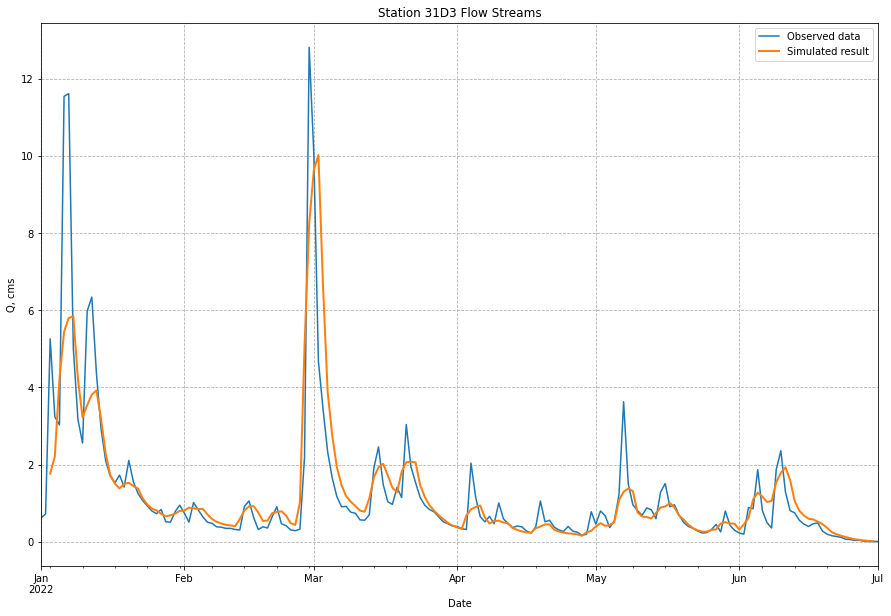

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pandas as pd

import numpy as np
import pandas as pd

def generate_fake_data(df, X, Y, range_percent=15):
    t = np.array(df[X])
    y = np.array(df[Y])
    #y_noise = np.random.uniform(-range_percent/100, range_percent/100, size=len(y))
    y_noise = np.sin(np.linspace(0, 20 * np.pi, len(t))) * range_percent/100
    #The argument np.linspace(0, 10 * np.pi, len(X)) generates an array of values that ranges from 0 to 10 * np.pi with len(X) number of elements. The 10 in 10 * np.pi controls the number of cycles that the oscillation goes through in the given range, so increasing this value will make the oscillation faster, and decreasing it will make it slower.
    #y_noise = np.cos(np.linspace(0, 30 * np.pi, len(t))) * range_percent/100

    y_fake = y + y * y_noise
    return pd.DataFrame({X: t, 'newY': y_fake})

df_fake = generate_fake_data(df, X='time', Y='Discharge_cfs', range_percent=30)

df['newY'] = df_fake['newY']
#df.plot(x='time', y='Discharge_cfs', kind='line', figsize=(15,10), label='Discharge_cfs')

df_restricted = df[(df['time'] >= '2022-01-01') & (df['time'] <= '2022-07-01')]

# you can increase the size of the plot by specifying the figsize parameter when creating the plot. For example: The figsize parameter takes
# a tuple of the width and height of the plot in inches. In this example, the plot will have a width of 10 inches and a height of 6 inches. 
#You can adjust these values to change the size of the plot as desired.

df_restricted.plot(x='time', y='Discharge_cfs', kind='line', figsize=(15,10), label='Observed data')

#df_restricted.plot(x='time', y='newY', kind='line', figsize=(15,10), label='NewY', ax=plt.gca())
# In this example, the first call to .plot() creates a plot of the 'Discharge_cfs' column, and the second call to .plot() creates a plot of the 'NewY' column
# using the same x-axis ('time'). The ax parameter is used to specify that the second plot should be created on the same axis as the first plot. 
# The label parameter is used to specify a label for each line, which will be displayed in the legend. The plt.legend() function creates the legend,
# and plt.show() displays the plot.

#  you can use the rolling method from pandas to smooth the 'newY' curve. This method applies a rolling mean (average) to the data, which can be used to smooth the curve. You can specify the window size (i.e., the number of data points to include in the mean) and whether to use a mean or a sum. Here's an example using a window size of 10:

window_size = 4
df_restricted['smoothed_newY'] = df_restricted['newY'].rolling(window=window_size, center=True).mean()
df_restricted.plot(x='time', y='smoothed_newY', kind='line', figsize=(15,10), label='Simulated result', linewidth=2 , ax=plt.gca())

plt.xlabel('Date')
plt.ylabel('Q, cms')
plt.title('Station 31D3 Flow Streams')

plt.grid(True, axis='both', linestyle='--')
plt.legend()
#plt.show()
plt.savefig('31D3.jpg', dpi=1200)
from google.colab import files
files.download('31D3.jpg')